# 1.Início do Projeto

A ideia do projeto surgiu com a necessidade de praticar o PowerBI. Me questionei que tipo de dados usaria para analisar num projeto. E nada melhor do que utilizar dados do meu jogador preferido no esporte que eu amo. Foi daí que busquei um dataset bem completo no Kaggle com todos os gols dele por clubes até junho de 2023.

Link do dataset: https://www.kaggle.com/datasets/azminetoushikwasi/-lionel-messi-all-club-goals

Perfeito. Só que nem tanto. Os gols estavam ali mas alguns dados pareciam inconsistentes na hora de passar para o PowerBI Desktop. A começar pela temporada (coluna Season) que não estava com a descrição padronizada. Problema esse resolvido, afinal, grande parte do trabalho do analista de dados é justamente refiná-los. E foi daí que tive o primeiro grande insight desse projeto: resolvi adicionar também os gols de Lionel Messi pela seleção argentina principal durante esse período.

E lá vou eu consultando a lista de gols oficiais dele e não só transcrevi todos eles como também os assisti um a um. Afinal, tinha que colocar no dataset como foi o gol, quem deu a assistência, posição no campo e etc. Não vou dizer que foi algum tipo de martírio pois é sempre um prazer ver os gols do Messi, mas é algo bem trabalhoso documentar tudo, isso é.

# Preparando o ambiente

Aqui preparamos o que usaremos potencialmente para as análises. Inicialmente tivemos um erro com o encoding UTF-8 mas conseguimos corrigir e carregar o CSV com o latin-1.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#carregar base de dados
data = pd.read_csv("/content/datamessi.csv", encoding='latin-1')
data.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,2004-2005,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Perna esquerda,Ronaldinho
1,2005-2006,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Perna esquerda,NaN
2,2005-2006,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Perna esquerda,Samuel Etoo
3,2005-2006,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Perna esquerda,Mark van Bommel
4,2005-2006,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Perna esquerda,Ronaldinho


# Primeiros números

Feito tudo isso, carreguei as informações aqui nesse notebook. Primeiramente fiz um gráfico de colunas clusterizado mostrando o número de gols por temporada de 2004/2005 (temporada de estreia) até 2022/2023 (a última jogando por um clube europeu).

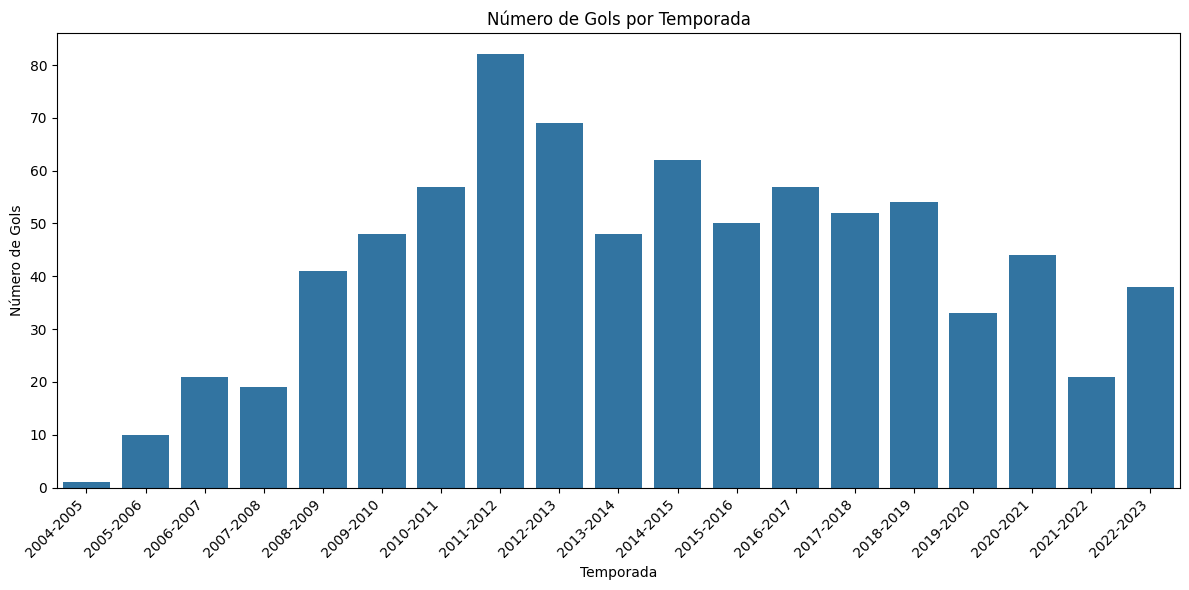

In [24]:
# Agrupando os dados por temporada e contando os gols
gols_por_temporada = data.groupby('Season')['Opponent'].count().reset_index(name='Total_Gols')

# Criando o gráfico de barras clusterizado
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Total_Gols', data=gols_por_temporada)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Temporada')
plt.ylabel('Número de Gols')
plt.title('Número de Gols por Temporada')
plt.tight_layout()
plt.show()

Em seguida, fiz um treemap porque mostra bem a proporção dos gols feitos pelo Barcelona em sua carreira.

In [26]:
import plotly.express as px

# Agrupando os dados por clube e contando os gols
gols_por_clube = data.groupby('Club')['Opponent'].count().reset_index(name='Total_Gols')

# Criando o treemap
fig = px.treemap(gols_por_clube, path=['Club'], values='Total_Gols',
                  title='Proporção de Gols por Clube')
fig.show()

# Insight

Agora dividimos os gols por clubes e seleção ao longo das temporadas.

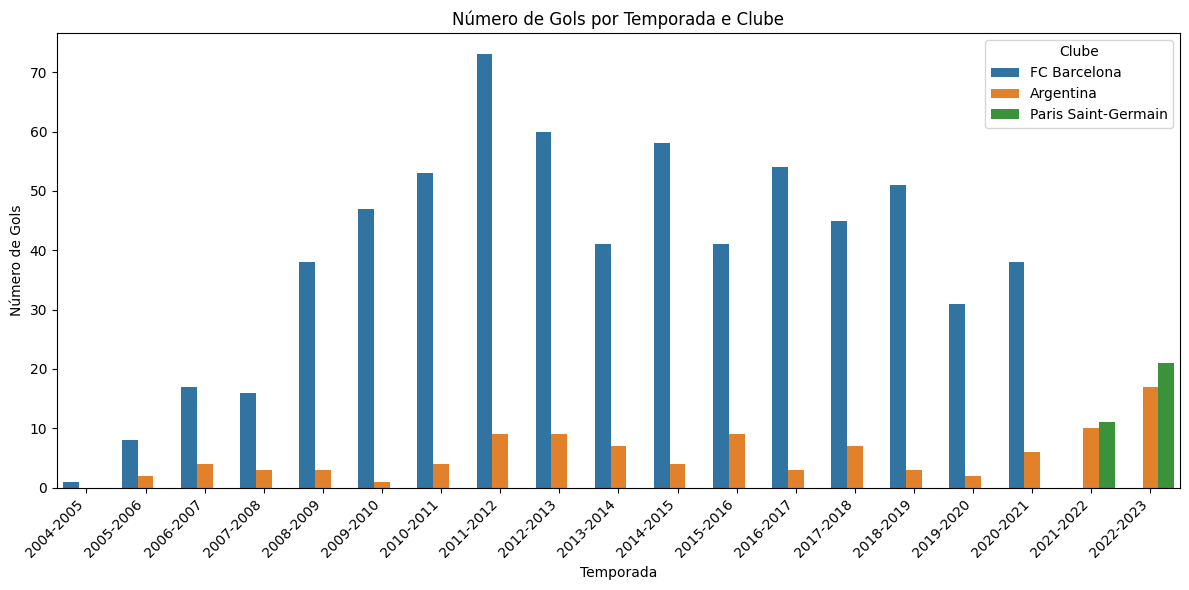

In [28]:
# Agrupando os dados por temporada, clube e contando os gols
gols_por_temporada_clube = data.groupby(['Season', 'Club'])['Opponent'].count().reset_index(name='Total_Gols')

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Total_Gols', hue='Club', data=gols_por_temporada_clube)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Temporada')
plt.ylabel('Número de Gols')
plt.title('Número de Gols por Temporada e Clube')
plt.tight_layout()
plt.legend(title='Clube')
plt.show()

Ele nunca fez tantos gols pela seleção quanto nas temporadas em que jogou pelo Paris Saint-Germain. Até em sua temporada de 82 gols (2011/2012), apenas 9 deles foram pela seleção. O normal é que os gols fossem caindo conforme ele fosse ficando mais veterano, mas pela Argentina a situação se inverteu: foi mais velho que Messi marcou mais!

Há explicação? Há um certo rancor com ele em Paris por supostamente não ter se esforçado tanto lá quanto em Barcelona, isso os números não explicam e particularmente não acredito que o diagnóstico seja esse. E há de se ressalta também que nesse período houve um amistoso contra a Estônia onde o Messi fez nada menos que 5 gols e também foi o período da Copa do Mundo de 2022 onde ele brilhou intensamente marcando 7 gols na competição e conquistando o tricampeonato mundial para a Argentina.

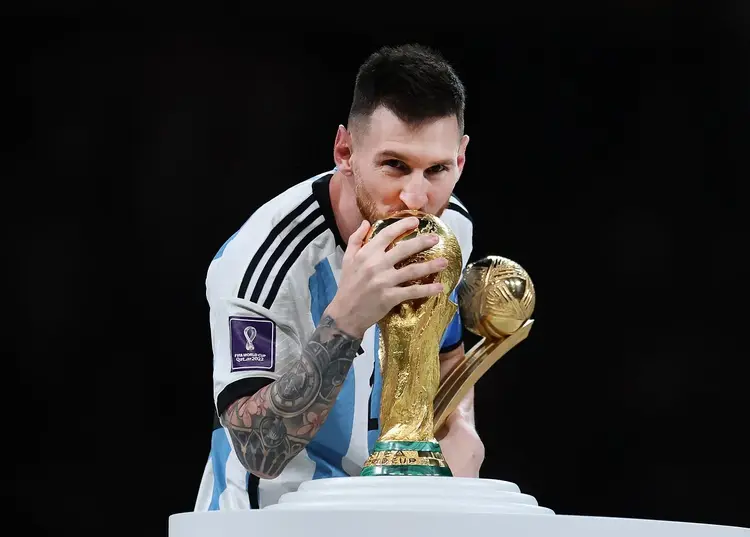

E Messi a parte, vamos combinar que o PSG é uma bagunça, né? Muitas estrelas e muito dinheiro mas a organização nunca foi adequada para atingir o sonho da Champions League, mas isso é uma outra análise. Essa, encerramos a primeira parte aqui mas seguiremos explorando os números e tendo insights. Espero que muitos.

Bom, deu um trabalhinho mas foi prazeroso fazer. E considero que está só no início, pois há um universo de números e análises que podem ser feitas e essas aqui são apenas bem básicas.

Obrigado!